# Метрики Precision и  recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('datasets/accurracy/affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
from sklearn.linear_model import LogisticRegression

# импотируем метод для автоматической разюивки на обучающую и тестовую выборки
# ранее использовали from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [6]:
 X = pd.get_dummies(data, columns=['occupation', 'occupation_husb', 'religious'])

In [7]:
X.head()

,rate_marriage,age,yrs_married,children,educ,affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,...,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0
0,3.0,32.0,9.0,3.0,17.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,27.0,13.0,3.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,16.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,16.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [8]:
del X['affair']
X.head()

,rate_marriage,age,yrs_married,children,educ,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,...,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0
0,3.0,32.0,9.0,3.0,17.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,27.0,13.0,3.0,14.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,16.0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,16.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,14.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [9]:
y = data['affair']

In [10]:
model = LogisticRegression(n_jobs=12, max_iter=100)

Разбиваем данные на обучающую и тестовую выборки в соотношении 70/30

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
print(len(X_train) / len(X))
print(len(y_train) / len(y))

0.6999685830977066
0.6999685830977066


Обучаем модель

In [13]:
model.fit(X_train, y_train)

LogisticRegression(n_jobs=12)

Получаем прогнозные значения модели (переменная predictions)

In [14]:
predictions = model.predict_proba(X_test)

In [15]:
for line in zip(predictions[:, 1], y_test):
    print(line[0]*100, line[1])

65.50733384708425 0
7.522120964498795 0
27.298199456907028 0
26.58756629738664 0
25.911164093980087 1
14.793441418931241 0
17.481095061659733 0
21.532443011348402 0
75.84014579614833 1
26.223546761866185 0
11.246213949403327 0
18.711423651858144 0
8.096306547774134 0
30.424078683586636 0
73.4852810327234 1
60.20600847343256 0
29.54433651201922 0
72.5495175449802 1
30.060812059717374 0
15.567184709406675 0
21.535090749398297 1
44.65469784604015 1
7.511124082685115 1
46.9723733084038 1
17.27542106199726 0
17.11483951065388 0
40.94416043552177 0
36.80772009531908 0
24.1396302398667 0
14.29335787304539 0
14.173058694756554 0
29.967981153529355 1
21.105287119409386 0
50.95569225052989 1
62.516809428157806 1
39.758590739210305 1
10.877478383111697 0
20.033018964664386 0
28.544885943523234 1
15.795695251384966 0
39.078980223059325 1
29.13463018609584 0
14.919212104257271 0
40.811048381045865 0
29.09923069268507 1
38.96338157795384 1
42.77720594393191 1
13.37417606204267 0
9.538940733099738 0


19.496978134325214 0
19.883530795067138 0
7.405950720130409 0
14.282302651205613 0
24.332891730107434 0
42.934598192248785 1
33.4040889878133 1
51.318480467330744 1
11.03979988309437 0
24.467220382501587 0
47.626575371955276 0
54.55993831871544 1
30.277695312631124 0
43.94649589427775 0
19.24640918056518 0
49.40109271375894 1
33.12634660249352 0
15.491563347039348 0
19.875896896544564 0
20.757203576736863 1
49.384549765841534 1
26.88597971294775 0
19.283556849768622 0
74.30176516972887 1
37.08717583291689 1
19.903913903970317 0
60.52304309787742 0
33.09110617031976 0
61.81168654622478 1
58.264612588762255 0
13.824115575725418 0
26.169753599159773 0
45.61338726829397 1
8.084543625304914 0
29.26305947599208 0
78.3894402657459 0
14.103854437684598 0
49.307044469848094 0
65.5171571426045 1
72.75813000955566 1
37.73568908520949 0
60.28929510291907 1
6.3473157424508795 0
17.908375891745195 1
16.1018702940181 0
8.24434139607297 0
30.673797027788 1
31.016745744803714 0
18.71457570029399 0
15.5

41.99873728557015 0
17.15311208499001 0
61.28195293930756 1
58.95072499076407 1
5.859113789536918 0
40.787285835576256 1
40.44452600865063 1
52.824335852488566 0
12.636279584980636 1
12.504141601409868 0
48.612013179438286 1
65.72829604151721 1
65.01236462490321 0
78.99438019153054 0
28.324916409859725 0
10.936332753955364 0
52.55029958645998 0
23.079643394898895 1
42.210172789148295 1
39.79295441556124 0
20.3129235008876 1
14.807365713848444 0
33.336977206397684 0
21.968095005289324 0
56.070679983499616 1
70.096939555819 1
45.67704811389912 0
23.274454111384856 0
23.601274467683844 0
24.467220382501587 1
30.010439609041278 0
19.766683807402675 0
25.259147101495838 1
9.87626445053537 0
11.04956724178487 0
45.2352419121003 1
17.317805773031782 0
14.55841916493161 0
40.14429505388847 0
16.221229192176885 0
55.36245686501209 0
33.94321486931957 1
77.89823312692954 1
26.169753599159773 0
8.096306547774134 0
70.95304279752125 1
25.314235424436315 0
10.434096741960994 0
31.21248855852748 0
1

In [16]:
model.score(X_test, y_test)

0.7308900523560209

In [17]:
for state in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
    model.fit(X_train, y_train)
#     for line in zip(predictions[:, 1], y_test):
#         print(line[0]*100, line[1])
    print(state, model.score(X_test, y_test) * 100,'%')

0 73.08900523560209 %
1 73.08900523560209 %
2 71.51832460732984 %
3 71.98952879581152 %
4 71.2565445026178 %
5 72.35602094240838 %
6 71.09947643979058 %
7 73.24607329842931 %
8 72.25130890052355 %
9 71.93717277486911 %


### Оценка качества модели

Счетаем Accuracy последней модели

In [18]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predict_prob, actual in zip(predictions[:, 1], y_test):
    
    if predict_prob > .5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [19]:
# Какая получилась точность
(tp + tn) / (tp + fp + fn + tn)

0.7193717277486911

## Используем готовые библиотеки

In [20]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix

In [21]:
pr, reca11, thres = precision_recall_curve(y_test, predictions[:, 1])

In [22]:
# посмотрим, что получилось
for line in zip(pr, reca11, thres):
    print(line)

(0.3086225026288118, 1.0, 0.03862708124015701)
(0.30825881115202525, 0.9982964224872232, 0.03874640093629297)
(0.30842105263157893, 0.9982964224872232, 0.03909566275568514)
(0.3080568720379147, 0.9965928449744463, 0.03939749009003895)
(0.3082191780821918, 0.9965928449744463, 0.0404934544960408)
(0.3083816552451239, 0.9965928449744463, 0.04116893001036081)
(0.30854430379746833, 0.9965928449744463, 0.04336894314422858)
(0.3087071240105541, 0.9965928449744463, 0.04463281107814015)
(0.308870116156283, 0.9965928449744463, 0.044666386735889144)
(0.3090332805071315, 0.9965928449744463, 0.045204694071028846)
(0.3091966173361522, 0.9965928449744463, 0.04662822182264188)
(0.3093601269169751, 0.9965928449744463, 0.04690627899314252)
(0.30952380952380953, 0.9965928449744463, 0.04710675270031474)
(0.3096876654314452, 0.9965928449744463, 0.04746653494280159)
(0.3098516949152542, 0.9965928449744463, 0.04818232257356959)
(0.31001589825119236, 0.9965928449744463, 0.04843955321216585)
(0.310344827586206

(0.4823529411764706, 0.6286201022146508, 0.33527232378355026)
(0.4829842931937173, 0.6286201022146508, 0.3360706568145186)
(0.48230668414154654, 0.626916524701874, 0.33620766040442546)
(0.480946123521682, 0.6235093696763203, 0.33631406502235117)
(0.48026315789473684, 0.6218057921635435, 0.3364857706463959)
(0.48089591567852435, 0.6218057921635435, 0.337048901653162)
(0.4815303430079156, 0.6218057921635435, 0.3373053884946463)
(0.4821664464993395, 0.6218057921635435, 0.3377242927878226)
(0.48148148148148145, 0.6201022146507666, 0.33823259710275305)
(0.4820717131474104, 0.6183986371379898, 0.33883571265575685)
(0.48271276595744683, 0.6183986371379898, 0.339275894425996)
(0.4833555259653795, 0.6183986371379898, 0.3394024312063677)
(0.48464619492656874, 0.6183986371379898, 0.33964103457338357)
(0.4852941176470588, 0.6183986371379898, 0.34005064894756826)
(0.4859437751004016, 0.6183986371379898, 0.34104097097406116)
(0.4865951742627346, 0.6183986371379898, 0.34272691717378667)
(0.4872483221

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


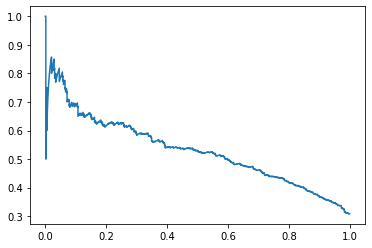

In [24]:
# print(reca11.shape, pr.shape)
plt.plot(reca11, pr)

In [25]:
from sklearn.metrics import average_precision_score, f1_score

In [26]:
# Площадь под кривой
average_precision_score(y_test, predictions[:, 1])

0.5314471128079572

In [27]:
F1 = 2 * (pr * reca11) / (pr + reca11)
F1

array([0.47167537, 0.47106109, 0.4712505 , ..., 0.00339559, 0.00340136,
       0.        ])

## ROC

In [28]:
# Посчитаем ROC-кривую (Receiver Operational Characteristic)
from sklearn.metrics import roc_curve

In [29]:
# аолучаем значение false и true positive rate ждя различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [30]:
for line in zip(fpr, tpr, thres):
    print(line)

(0.0, 0.0, 1.950902252071693)
(0.0, 0.0017035775127768314, 0.9509022520716929)
(0.0007558578987150416, 0.0017035775127768314, 0.9015206100008382)
(0.0007558578987150416, 0.005110732538330494, 0.8893381221369856)
(0.0015117157974300832, 0.005110732538330494, 0.889320226749499)
(0.0015117157974300832, 0.020442930153321975, 0.8776389793398316)
(0.0022675736961451248, 0.020442930153321975, 0.8773745708122778)
(0.0022675736961451248, 0.028960817717206135, 0.8545668009014886)
(0.0030234315948601664, 0.028960817717206135, 0.8505245557505821)
(0.0030234315948601664, 0.030664395229982964, 0.8504861940619125)
(0.003779289493575208, 0.030664395229982964, 0.8473004811695553)
(0.003779289493575208, 0.034071550255536626, 0.8440720885529948)
(0.0045351473922902496, 0.034071550255536626, 0.8434050559224869)
(0.0045351473922902496, 0.04599659284497445, 0.8374827496120224)
(0.006046863189720333, 0.04599659284497445, 0.8335700610680392)
(0.006046863189720333, 0.056218057921635436, 0.8261458765357095)
(0.

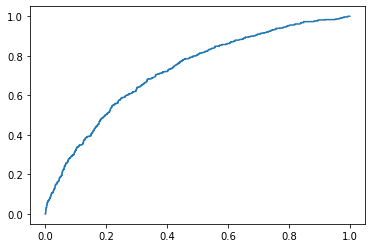

In [31]:
plt.plot(fpr, tpr)

### Построим ещё одну модель и сравним их между собой

In [32]:
Xshort = X.loc[:, ['age', 'children']]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [34]:
model2 = LogisticRegression(n_jobs=6)

In [35]:
X_train_short, X_test_short, y_train, y_test = train_test_split(Xshort, y, test_size=0.3, random_state=0)

In [37]:
model2.fit(X_train_short, y_train)

LogisticRegression(n_jobs=6)

In [38]:
predictions2 = model2.predict_proba(X_test_short)

In [39]:
fpr2, tpr2, thres2 = roc_curve(y_test, predictions2[:, 1])

In [40]:
for line in zip(fpr2, tpr2, thres2):
    print(line)

(0.0, 0.0, 1.5358127190588347)
(0.014581734458940905, 0.019769357495881382, 0.5358127190588345)
(0.02532617037605526, 0.042833607907743, 0.5034562519338708)
(0.051419800460475826, 0.060955518945634266, 0.4846287988792598)
(0.05372217958557176, 0.0642504118616145, 0.4710708095676202)
(0.0636991557943208, 0.08237232289950576, 0.45235114484110356)
(0.09363008442056792, 0.13344316309719934, 0.4506186584546639)
(0.10744435917114352, 0.14497528830313014, 0.42046935771937466)
(0.13737528779739064, 0.1927512355848435, 0.41876560764828913)
(0.17114351496546432, 0.24052718286655683, 0.4170637929551008)
(0.17344589409056024, 0.24382207578253706, 0.38923754107972497)
(0.20721412125863392, 0.2883031301482702, 0.38757570815005477)
(0.23023791250959325, 0.3311367380560132, 0.385916487218004)
(0.2356101304681504, 0.342668863261944, 0.384259912636193)
(0.24481964696853414, 0.35914332784184516, 0.3572808920345953)
(0.29470452801227937, 0.44810543657331137, 0.3556760425721503)
(0.3039140445126631, 0.4579

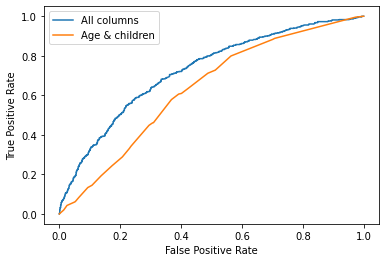

In [45]:
plt.plot(fpr, tpr, label='All columns')
plt.plot(fpr2, tpr2, label='Age & children')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show()

### Посчитаем площать под ROC-кривой для двух моделей

In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
roc_auc_score(y_test, predictions[:, 1])

0.5119790724990233

In [49]:
roc_auc_score(y_test, predictions2[:, 1])

0.6311452091928271

Можно посчитать с помощью более общего метода auc

In [50]:
from sklearn.metrics import auc

In [51]:
auc(fpr, tpr)

0.7235446516293438

In [52]:
auc(fpr2, tpr2)

0.6311452091928271

## Угадываем пол спортсмена

In [53]:
import pandas as pd
import numpy as np

In [54]:
data = pd.read_csv('datasets/accurracy/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


### Попробуем угадать пол спортсмена

In [55]:
data = data[pd.isnull(data['height']) == 0]
data = data[pd.isnull(data['weight']) == 0]

In [57]:
# Попробуем выбрать какие-нибудь признаки
selectColumns = data[['height', 'weight', 'sport', 'sex']]
X = pd.get_dummies(selectColumns, columns=['sport'])

del X['sex']

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['sex'])
y = pd.Series(data=le.transform(data['sex']))

## Строим модель и предсказания predictions

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## По значениям y_test и predictions считаем percision_recall_curve и ROC

In [62]:
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
model3 = LogisticRegression(n_jobs=6)

In [65]:
model3.fit(X_train, y_train)

LogisticRegression(n_jobs=6)

In [66]:
predictions3 = model3.predict_proba(X_test)

In [68]:
fpr3, tpr3, thres3 = roc_curve(y_test, predictions3[:, 1])

In [77]:
len(thres3)

2765

In [69]:
for line in zip(fpr3, tpr3, thres3):
    print(line)

(0.0, 0.0, 1.9999978755960355)
(0.0, 0.0005675368898978433, 0.9999978755960355)
(0.0, 0.00681044267877412, 0.999884957256689)
(0.0006684491978609625, 0.00681044267877412, 0.9998175082870491)
(0.0006684491978609625, 0.01191827468785471, 0.9996486058746096)
(0.001336898395721925, 0.01191827468785471, 0.9996313596412963)
(0.001336898395721925, 0.017593643586833144, 0.9994141071910899)
(0.002005347593582888, 0.017593643586833144, 0.999271962238243)
(0.002005347593582888, 0.02894438138479001, 0.997281191921871)
(0.00267379679144385, 0.02894438138479001, 0.997233036369086)
(0.00267379679144385, 0.03064699205448354, 0.9970905939179915)
(0.0033422459893048127, 0.03064699205448354, 0.9970011184164915)
(0.0033422459893048127, 0.031214528944381384, 0.996869401636748)
(0.004010695187165776, 0.031214528944381384, 0.9964663176607502)
(0.004010695187165776, 0.03518728717366629, 0.9950367380817282)
(0.004679144385026738, 0.03518728717366629, 0.9949887257310797)
(0.004679144385026738, 0.036889897843359

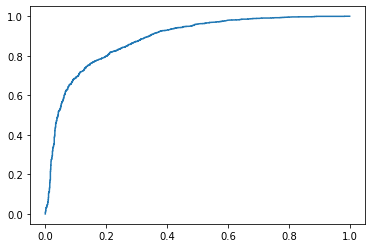

In [70]:
plot(fpr3, tpr3)

In [71]:
auc(fpr3, tpr3)

0.8850034067388177

In [73]:
tp3 = 0 # True positive
fp3 = 0 # False positive
fn3 = 0 # False negative
tn3 = 0 # True negative

predictions = model3.predict_proba(X_test)
for predict_prob, actual in zip(predictions[:, 1], y_test):
    
    if predict_prob > .5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [74]:
pr3, reca113, thres3 = precision_recall_curve(y_test, predictions[:, 1])

In [75]:
# Какая получилась точность
(tp + tn) / (tp + fp + fn + tn)

0.770704334365325

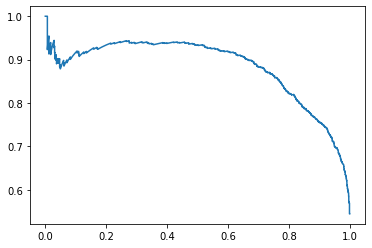

In [76]:
# print(reca11.shape, pr.shape)
plt.plot(reca113, pr3)

# Cross validation

# Классификация картинок

In [78]:
from sklearn.datasets import load_digits

In [79]:
data = load_digits()

In [80]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [81]:
# описание данных
for line in data['DESCR'].split('\n'):
    print(line)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [82]:
# закодированные признаки

X = pd.DataFrame(data['data'])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [83]:
# Целевая переменная - цифра от 0 до 9

y = pd.Series(data['target'])
y.head()

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [84]:
y.tail()

1792    9
1793    0
1794    8
1795    9
1796    8
dtype: int32

In [85]:
y_dummy = pd.get_dummies(y)

In [86]:
y_dummy.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [87]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
# Зададим пока одно значение параметра модели max_depth
depth = 5

In [94]:
from sklearn.model_selection import cross_val_score
import statistics

In [93]:
cross_val_score(DecisionTreeClassifier(max_depth=depth), X, y, cv=5, scoring='accuracy')

array([0.63055556, 0.49722222, 0.67688022, 0.72423398, 0.62395543])

In [105]:
means = []
stds = []
for depth in range(1,20):
    cvs_var = cross_val_score(DecisionTreeClassifier(max_depth=depth), X, y, cv=5, scoring='accuracy')
    
    print(depth, cvs_var.mean())
    means.append(cvs_var.mean())
    stds.append(cvs_var.std())

1 0.19754874651810586
2 0.31218817703497365
3 0.43297431135871245
4 0.5487527081398949
5 0.628899721448468
6 0.7173723305478179
7 0.7473939956669762
8 0.7818956979263386
9 0.7796765707211389
10 0.7885747446610956
11 0.7802259362426494
12 0.7868956979263386
13 0.7813463324048282
14 0.788571649644073
15 0.7857985143918291
16 0.7724528009904055
17 0.785803156917363
18 0.7885639121015166
19 0.78301918910554


In [106]:
max(means)

0.7885747446610956

<ErrorbarContainer object of 3 artists>

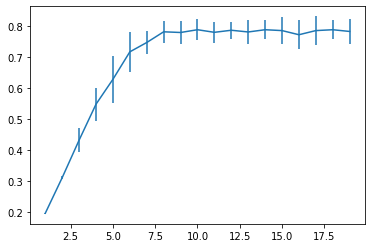

In [108]:
plt.errorbar(range(1, 20), means, stds)

## Можно тоже самое с помощью метода grid search

In [109]:
from sklearn.model_selection import GridSearchCV

In [111]:
params = [{'max_depth': list(range(1, 20))}]

In [116]:
gs = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, scoring='accuracy', return_train_score=False, n_jobs=6)

In [117]:
gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=6,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}],
             scoring='accuracy')

In [118]:
gs.cv_results_

{'mean_fit_time': array([0.01000023, 0.01199913, 0.01399922, 0.01499929, 0.01899729,
        0.02399545, 0.02199764, 0.02599616, 0.02299719, 0.02653193,
        0.02606726, 0.02695875, 0.0301446 , 0.02800589, 0.02883945,
        0.02854214, 0.02996745, 0.02583737, 0.02470975]),
 'std_fit_time': array([1.08735602e-06, 2.44999359e-03, 1.99914073e-03, 3.16129543e-03,
        2.00038059e-03, 1.99999824e-03, 3.99931673e-03, 3.74209999e-03,
        2.44896195e-03, 3.06963956e-03, 2.52188660e-03, 2.97000194e-03,
        4.03236728e-03, 4.59152332e-03, 2.48515500e-03, 4.59156371e-03,
        5.03646564e-03, 5.07303273e-03, 1.55602738e-03]),
 'mean_score_time': array([0.00199995, 0.00399976, 0.00299921, 0.00499935, 0.00299993,
        0.00200014, 0.00200019, 0.00400043, 0.00353551, 0.00400515,
        0.00399899, 0.00141597, 0.00323467, 0.00499864, 0.00500145,
        0.0035152 , 0.00251451, 0.00440402, 0.0039947 ]),
 'std_score_time': array([2.44942901e-03, 1.99987912e-03, 2.44884512e-03, 1.03

In [119]:
gs.best_params_

{'max_depth': 12}